In [1]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import START, END
from langgraph.graph.state import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.tools import tool
from langchain_core.messages import BaseMessage

import os
from dotenv import load_dotenv
load_dotenv()


True

In [2]:
os.environ['GROQ_API_KEY']=os.getenv('GROQ_API_KEY')
os.environ['LANGCHAIN_API_KEY']=os.getenv('LANGCHAIN_API_KEY')
os.environ['LANGSMITH_TRACING']='true'
os.environ['LANGSMITH_PROJECT']='TestProject'

In [3]:
@tool
def add(a:int, b:int)->int:
    """
    Add two numbers a, b
    """
    return a+b
tools=[add]
tool_node = ToolNode([add])

In [4]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm = ChatGroq(model='llama-3.3-70b-versatile')

In [5]:
llm_with_tools = llm.bind_functions([add])

C:\Users\Bhanu2003\AppData\Local\Temp\ipykernel_3180\336509976.py:1: LangChainDeprecationWarning: The method `ChatGroq.bind_functions` was deprecated in langchain-groq 0.2.1 and will be removed in 1.0.0. Use :meth:`~langchain_groq.chat_models.ChatGroq.bind_tools` instead.
  llm_with_tools = llm.bind_functions([add])


In [6]:
class State(TypedDict):
    messages:Annotated[list[BaseMessage],add_messages]

In [7]:
def call_llm_model(state:State):
    return {"messages":[llm_with_tools.invoke(state['messages'])]}

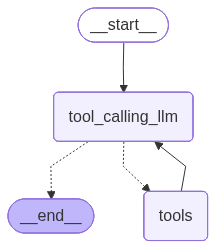

In [8]:
graph = StateGraph(State)

graph.add_node("tool_calling_llm", call_llm_model)
graph.add_node("tools", ToolNode(tools))

graph.add_edge(START, "tool_calling_llm")
graph.add_conditional_edges("tool_calling_llm",tools_condition)
graph.add_edge("tools", "tool_calling_llm")
graph.compile()

In [9]:
graph=graph.compile()

In [10]:
res=graph.invoke({"messages":["Whaat is latest news on llms"]})

print(res['messages'][-1].content)

I'm not able to provide real-time information, but I can suggest checking the latest news and updates on Large Language Models (LLMs) through reputable sources such as tech news websites, academic journals, or official announcements from organizations developing LLMs.


In [11]:
res=graph.invoke({"messages":["Whaat is machine learning"]})

print(res['messages'][-1].content)

Machine learning is a subset of artificial intelligence (AI) that involves the use of algorithms and statistical models to enable machines to learn from data, make decisions, and improve their performance over time. It allows computers to automatically learn and improve from experience without being explicitly programmed.

In traditional programming, a computer is given a set of rules and instructions to follow. In contrast, machine learning involves training a computer on a dataset, so it can learn to make predictions, classify objects, or make decisions based on that data.

Machine learning has many applications, including:

1. Image and speech recognition
2. Natural language processing
3. Predictive analytics
4. Recommendation systems
5. Autonomous vehicles
6. Medical diagnosis
7. Fraud detection
8. Customer service chatbots

Machine learning involves several key steps:

1. Data collection: Gathering data relevant to the problem you want to solve.
2. Data preprocessing: Cleaning, tr

In [12]:
res = graph.invoke({"messages":["whats is 2+4?", "what is 4+8?"]})
print(res['messages'][-1].content)

The answer to 2+4 is 6 and the answer to 4+8 is 12.
